# 电商数据分析项目目录

1. [项目介绍](#项目介绍)
2. [框架确定](#框架确定)
    1. [分析框架](#分析框架)
    2. [报告框架](#报告框架)
    3. [明确定义](#明确定义)
3. [数据分析报告](#分析总结)
4. [数据集概要](#数据集概要)
5. [获取数据集](#获取数据集)
6. [理解数据集](#理解数据集)
7. [分析视角：人 - 客户](#分析视角：人 - 客户)
    1. [模块一：基础属性](#模块一：基础属性)
        1.[客户地理位置分布情况](#客户地理位置分布情况)
    2. [模块二：行为偏好](#模块二：行为偏好)
        1.[客户购物偏好](#客户购物偏好)
        2.[新老客户占比](#新老客户占比)    
    3. [模块三：交易属性](#模块三：交易属性)
        1.[客户行为分析](#客户行为分析)
        2.[RFM 模型细分客户价值](#RFM 模型细分客户价值)
8. [分析视角：人 - 平台](#分析视角：人 - 平台)
    1. [模块一：满意度调查](#模块一：满意度调查)
9. [分析视角：货](#分析视角：货)
    1. [模块一：商品交易](#模块一：商品交易)
10. [分析视角：场](#分析视角：场)
    1. [模块一：交易订单](#模块一：交易订单)

---

# 项目介绍

- 项目领域：电商
- 数据来源：Olist Store 巴西电商平台
- 数据类别：真实订单交易数据
- 时间跨度：2016年至2018年
- 可视化工具：Teableau 2019 professional edition、Matplotlib、Seaborn


# 框架确定

## 分析框架

本次分析将从人、货、场这三个视角入手，框架如下图：

![分析框架](人、货、场.png)


## 报告框架/分析目的

本次的分析报告将以下图的框架进行撰写：

![报告框架](报告框架.png)


**鉴于此次数据集的信息，分析框架和报告框架均已折叠了用不到的部分**


## 明确定义

在电商领域，经常会出现用户、访客、客户、顾客、会员、注册会员等字眼，为了最大程度上避免理解误差，本次分析将遵循如下分类标准：

![访客分类](访客.png)


# 数据集概要

巴西电子商务平台 Olist Store 提供的从2016年至2018年之间10万多条的真实订单交易数据。
 
- 数据集来源：[Kaggle 公开数据集](https://www.kaggle.com/olistbr/brazilian-ecommerce)
- 数据集大小：10万多条的真实订单数据(脱敏)
- 该数据集包含9张表

表名 | 说明
-|-
olist_customers_dataset.csv | 客户及其位置的信息
olist_geolocation_dataset.csv |巴西邮政编码及其纬度/经度坐标信息
olist_Order Items Dataset.csv|每个订单中购买的商品的数据
olist_Payments Dataset.csv|订单付款的数据
olist_Order Reviews Dataset.csv|客户所做评论的数据
olist_Order Dataset.csv|订单交易数据
olist_Products Dataset.csv|Olist销售的产品的数据
olist_Sellers Dataset.csv| Olist完成订单的卖家的数据。
product_Category Name Translation.csv|将商品名从葡萄牙语翻译为英语

各表之间的关系如下：

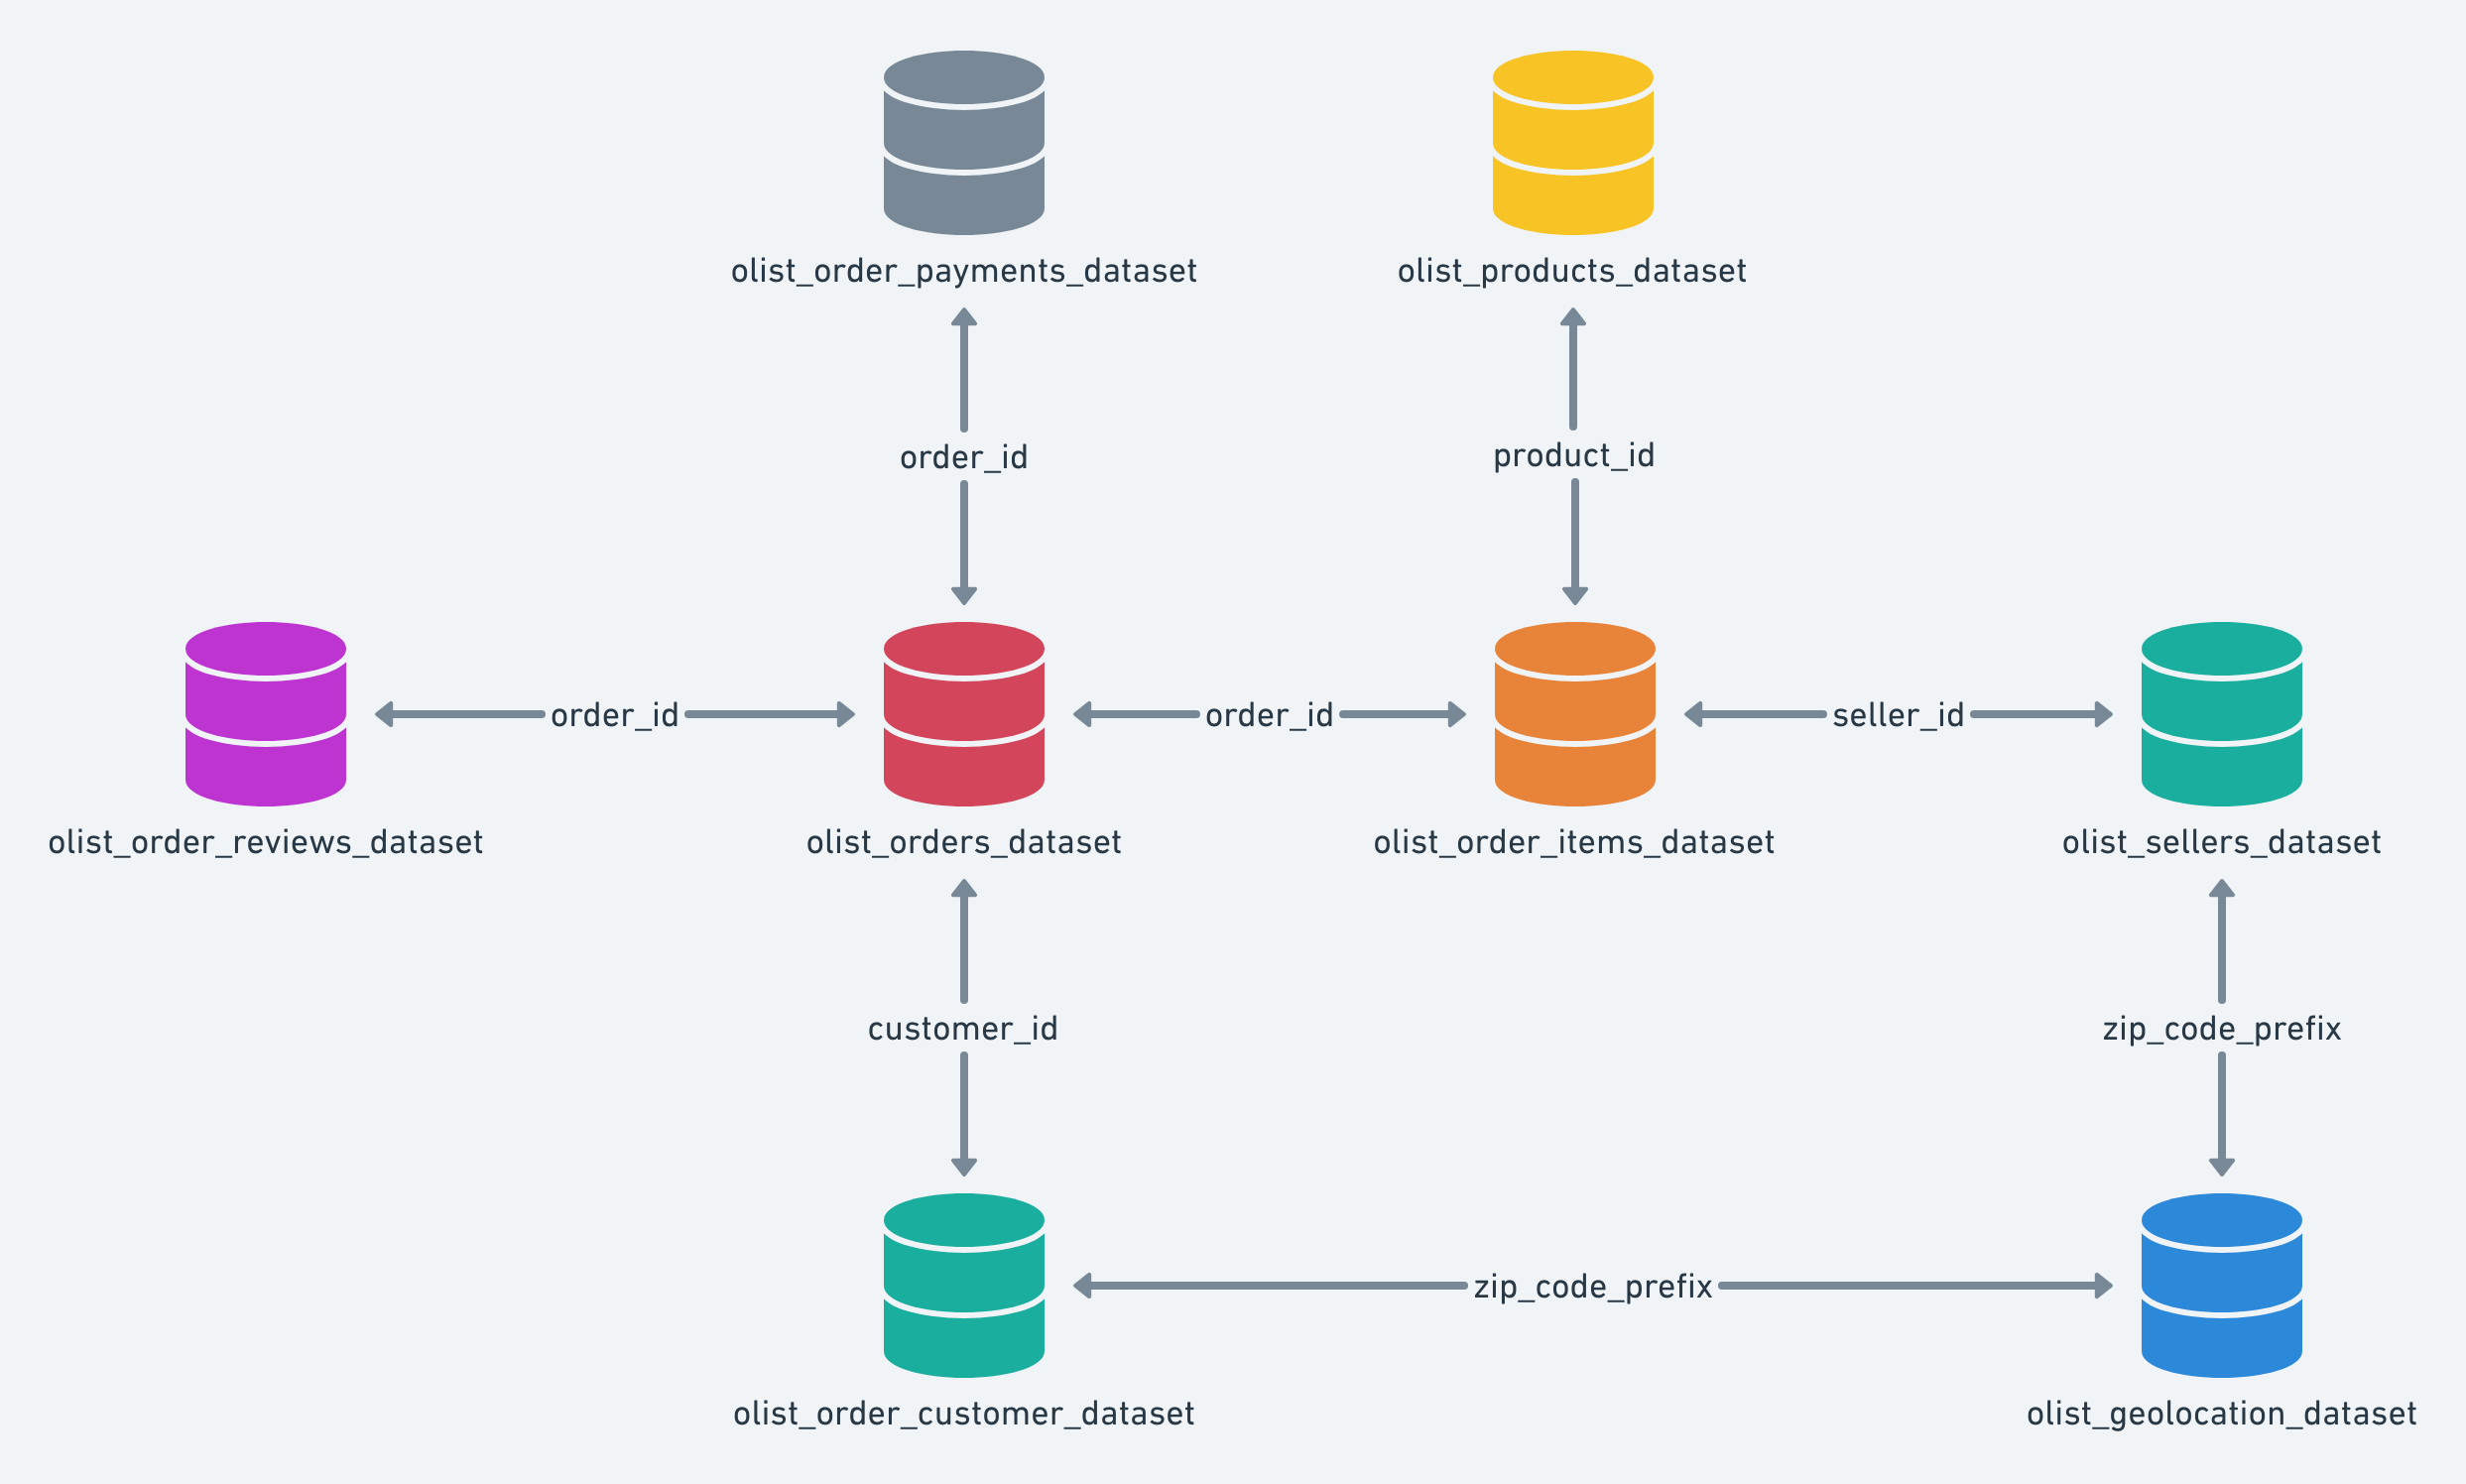

## 导入相关库

In [2]:
import numpy as np  # 科学计算工具包
import pandas as pd  # 数据分析工具包
import matplotlib.pyplot as plt # 图表绘制工具包
import seaborn as sns # 基于 matplot, 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，这会提高图表的可读性和美观性
import os,pymysql
from sqlalchemy import create_engine # 数据库

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

# 在 jupyter notebook 里面显示图表
%matplotlib inline 

## 获取数据集

In [3]:
# 目录下所有 CSV 文件
table_list= [filename for filename in os.listdir('.') if filename.endswith('.csv') ]
print(table_list)

['olist_sellers_dataset.csv', 'sale_data.csv', 'product_category_name_translation.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'review_data.csv', 'olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv']


In [4]:
# 获取数据集
orders = pd.read_csv("olist_orders_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
geo = pd.read_csv("olist_geolocation_dataset.csv")
pro_trans = pd.read_csv("product_category_name_translation.csv")

## 理解数据集

通过预览数据，了解所有字段和其含义。

字段 | 说明
-|-
product_id|商品ID
seller_id|商家ID
order_id|订单ID
customer_id|订单对应的用户ID（每个订单有一个唯一的customer_id）
order_status|订单状态
order_purchase_timestamp|下单时间
order_approved_at|付款审批时间
order_delivered_carrier_date|快递揽收日期
order_delivered_customer_date|订单送达日期
order_estimated_delivery_date|预计送达日期
customer_unique_id|客户唯一标识符
customer_zip_code_prefix|客户邮政编码前5位
customer_city|客户所在城市
customer_state|客户所在的州
review_id|评论ID
review_score|评价得分，客户在满意度调查中给出的注释范围为1到5。
review_comment_title|评论标题（葡萄牙语）
review_comment_message|评论内容（葡萄牙语）
review_creation_date|发出满意度调查日期
review_answer_timestamp|客户满意度回复日期
payment_sequential|付款序列(客户可以使用多种付款方式支付同一个订单）
payment_type|付款方式
payment_installments|分期付款期数
payment_value|交易金额
order_item_id|序号，用于标识同一订单中包含的商品数量。 
price|商品价格
freight_value|单个商品的运费（如果订单包含多个商品，总运费平摊到每个商品中）
shipping_limit_date|显示将订单处理到物流合作伙伴的卖家发货限制日期
seller_zip_code_prefix|卖家邮政编码前5位
seller_city|卖家所在城市
seller_state|卖家所在州 
product_category_name|产品品类名称（葡萄牙语）
product_category_name_english|产品品类名称（英语）
product_name_lenght|产品名称长度
product_description_lenght|产品说明长度
product_photos_qty|产品照片数量
product_weight_g|产品重量单位g
product_length_cm|产品长度单位cm
product_height_cm|产品高度单位cm
product_width_cm|产品宽度单位cm

## 合并数据表

合并几个数据表，得到一个涵盖交易基本信息的基础数据集

表名|导入名|说明
-|-
olist_Order Dataset.csv|orders|订单信息
olist_Payments Dataset.csv |payments| 支付信息
olist_Order Items Dataset.csv|order_items |商品信息
olist_customers_dataset.csv | customers|客户信息


In [5]:
# 合并表
order_payment = pd.merge(orders,payments, on='order_id',how='left')
payorder_customer =  pd.merge(order_payment,customers, on='customer_id',how='left')
basic_data = pd.merge(payorder_customer,order_items, on='order_id',how='left')

basic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   payment_sequential             118431 non-null  float64
 9   payment_type                   118431 non-null  object 
 10  payment_installments           118431 non-null  float64
 11  payment_value                  118431 non-null  float64
 12  customer_unique_id            

## 清洗数据集

### 缺失值处理

In [6]:
# 预览数据集

basic_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [7]:
# 统计缺失值数量和占比

def missing_info(data,num):
    # func:统计缺失值数量和占比函数
    # data: dataframe类型
    # num: 数字类型，显示前几行数据
    # return: 缺失值统计\占比

    null_data = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()
    missing_data = pd.concat([null_data,percent_1.apply(lambda x: format(x, '.2%'))],axis=1,keys=['total missing','missing percentage'])
    print(missing_data.head(num))

missing_info(basic_data,15)

                               total missing missing percentage
order_delivered_customer_date           3397              2.87%
order_delivered_carrier_date            2074              1.75%
freight_value                            830              0.70%
price                                    830              0.70%
shipping_limit_date                      830              0.70%
seller_id                                830              0.70%
product_id                               830              0.70%
order_item_id                            830              0.70%
order_approved_at                        176              0.15%
payment_sequential                         3              0.00%
payment_type                               3              0.00%
payment_installments                       3              0.00%
payment_value                              3              0.00%
customer_unique_id                         0              0.00%
order_estimated_delivery_date           

缺失值处理：

- order_delivered_customer_date、order_delivered_carrier_date 字段缺失值数量分别为3229，2074，相对其他缺失数据较多，但是占整体数据较少仅 2.87%，1.75%，，可直接删除缺失值。
- 其他字段的缺失值与整体数据相比就更少了，亦可删除。

In [8]:
# 删除缺失值

basic_data = basic_data.dropna()
basic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115018 non-null  object 
 1   customer_id                    115018 non-null  object 
 2   order_status                   115018 non-null  object 
 3   order_purchase_timestamp       115018 non-null  object 
 4   order_approved_at              115018 non-null  object 
 5   order_delivered_carrier_date   115018 non-null  object 
 6   order_delivered_customer_date  115018 non-null  object 
 7   order_estimated_delivery_date  115018 non-null  object 
 8   payment_sequential             115018 non-null  float64
 9   payment_type                   115018 non-null  object 
 10  payment_installments           115018 non-null  float64
 11  payment_value                  115018 non-null  float64
 12  customer_unique_id            

### 异常值处理

In [9]:
# 观察数据异常情况

basic_data.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value
count,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000
mean,1.090699,2.936958,171.915654,35081.609113,1.196404,120.080129,19.995686
std,0.684409,2.772466,266.125730,29851.527722,0.699409,183.038922,15.744372
min,1.000000,0.000000,0.000000,1003.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,60.850000,11310.000000,1.000000,39.900000,13.080000
50%,1.000000,2.000000,108.190000,24320.000000,1.000000,74.900000,16.280000
75%,1.000000,4.000000,188.940000,58801.750000,1.000000,133.000000,21.180000
max,26.000000,24.000000,13664.080000,99980.000000,21.000000,6735.000000,409.680000


异常值情况

- payment_installments 最小值为0
    + 付款要么一次性付清，要么分期付款，而分期付款一般有3、6、12、24期等。
    + 分期付款期数为1时，说明用户是一次性付清，没有分期。所以这里为0是异常值

- payment_value 最小值为0
    + 支付金额为0的情况有点异常，但不排除是使用代金券或者礼品卡。需要查询详细数据。

In [10]:
# 查询异常值的详细数据 payment_installments

basic_data[basic_data['payment_installments']==0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
75796,744bade1fcf9ff3f31d860ace076d422,5e5794daaa13f73e2f1cdb4114529843,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,2018-05-16 00:00:00,2.0,credit_card,...,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,1.0,0cf573090c66bb30ac5e53c82bdb0403,7202e2ba20579a9bd1acb29e61fe71f6,2018-04-26 12:31:06,45.90,12.79
78915,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06 00:00:00,2.0,credit_card,...,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1.0,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28
78916,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06 00:00:00,2.0,credit_card,...,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,2.0,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28


可以看出，异常数据的支付金额不为0，并使用借记卡进行支付，但分期付款期数为0，明显矛盾，删除这类异常值

In [11]:
# 查询异常值的详细数据 payment_installments

basic_data[basic_data['payment_value']==0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
503,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10 00:00:00,3.0,voucher,...,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,1.0,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2017-06-15 21:30:18,56.99,14.15
38539,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22 00:00:00,4.0,voucher,...,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,RJ,1.0,2ee4be9805f228255a38a6f9b03fff1a,da20530872245d6cd9d2f5725613c430,2017-11-03 00:46:58,94.00,28.04
102033,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29 00:00:00,4.0,voucher,...,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,1.0,e306ca54c91b21392317d5b4632c9fe3,e49c26c3edfa46d227d5121a6b6e4d37,2017-06-01 19:35:17,135.30,36.27
115449,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21 00:00:00,4.0,voucher,...,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,RJ,1.0,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.00,15.16


可以看到，异常数据的支付方式是代金券，印证了之前的想法，说明这类数据不属于异常值

异常数据加起来一共2条，可根据 index 删除

In [12]:
# 删除异常值

basic_data=basic_data.drop(index=basic_data[basic_data['payment_installments']==0].index)
basic_data.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value
count,115015.000000,115015.000000,115015.000000,115015.000000,115015.000000,115015.000000,115015.000000
mean,1.090675,2.937034,171.917368,35081.713272,1.196400,120.082137,19.995692
std,0.684403,2.772461,266.128934,29851.764382,0.699414,183.040887,15.744557
min,1.000000,1.000000,0.000000,1003.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,60.850000,11310.000000,1.000000,39.900000,13.080000
50%,1.000000,2.000000,108.190000,24320.000000,1.000000,74.900000,16.280000
75%,1.000000,4.000000,188.940000,58803.000000,1.000000,133.000000,21.180000
max,26.000000,24.000000,13664.080000,99980.000000,21.000000,6735.000000,409.680000


In [218]:
basic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115015 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115015 non-null  object 
 1   customer_id                    115015 non-null  object 
 2   order_status                   115015 non-null  object 
 3   order_purchase_timestamp       115015 non-null  object 
 4   order_approved_at              115015 non-null  object 
 5   order_delivered_carrier_date   115015 non-null  object 
 6   order_delivered_customer_date  115015 non-null  object 
 7   order_estimated_delivery_date  115015 non-null  object 
 8   payment_sequential             115015 non-null  float64
 9   payment_type                   115015 non-null  object 
 10  payment_installments           115015 non-null  float64
 11  payment_value                  115015 non-null  float64
 12  customer_unique_id            

### 重复值处理

In [13]:
# 查看每一行数据是否存在重复值

basic_data.duplicated().sum()

0

没有重复值，不需要进行处理。

### 数据类型转化

In [14]:
# 日期时间数据类型转化

def transform_datetime(data,column_list):
    # func: 日期时间字符串转化函数
    # data: dataframe类型
    # num: 数字类型，显示前几行数据
    # return: 日期时间类型数据
    
    for i in column_list:
        data[i] = pd.to_datetime(data[i])
    print('日期时间数据类型转化完成')
    
data = basic_data
column_list =['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'] 
transform_datetime(data,column_list)

日期时间数据类型转化完成


数据清洗后

- 样本大小：115015 条数据
- 字段：22个
- 有少量缺失值，已删除
- 有少量异常值,已删除
- 无重复值

## 导出到数据库

In [221]:
### 导出到 mysql 数据库

def export_mysql(data,user,password,host_port,db,table_name):
    # func: 导出到 mysql 数据库函数
    # data: Dataframe 类型
    # user: 用户名
    # password: 密码
    # host_port: 主机，端口
    # db: 数据库名
    # table_name: 表名

    print('将清洗后的数据导出到 mysql')
    engine = create_engine("mysql+pymysql://{}:{}@{}/{}".format(user, password, host_port, db))
    con = engine.connect()#创建连接
    data.to_sql(table_name,engine,if_exists='replace',index=False)
    print('成功导出')
    
user = 'root'
password = '1234567890'
host_port = '127.0.0.1:3306'
db = 'test'

data = basic_data
table_name = 'basic_data'

export_mysql(data,user,password,host_port,db,table_name)

将清洗后的数据导出到 mysql
成功导出


# 分析视角：人 - 客户

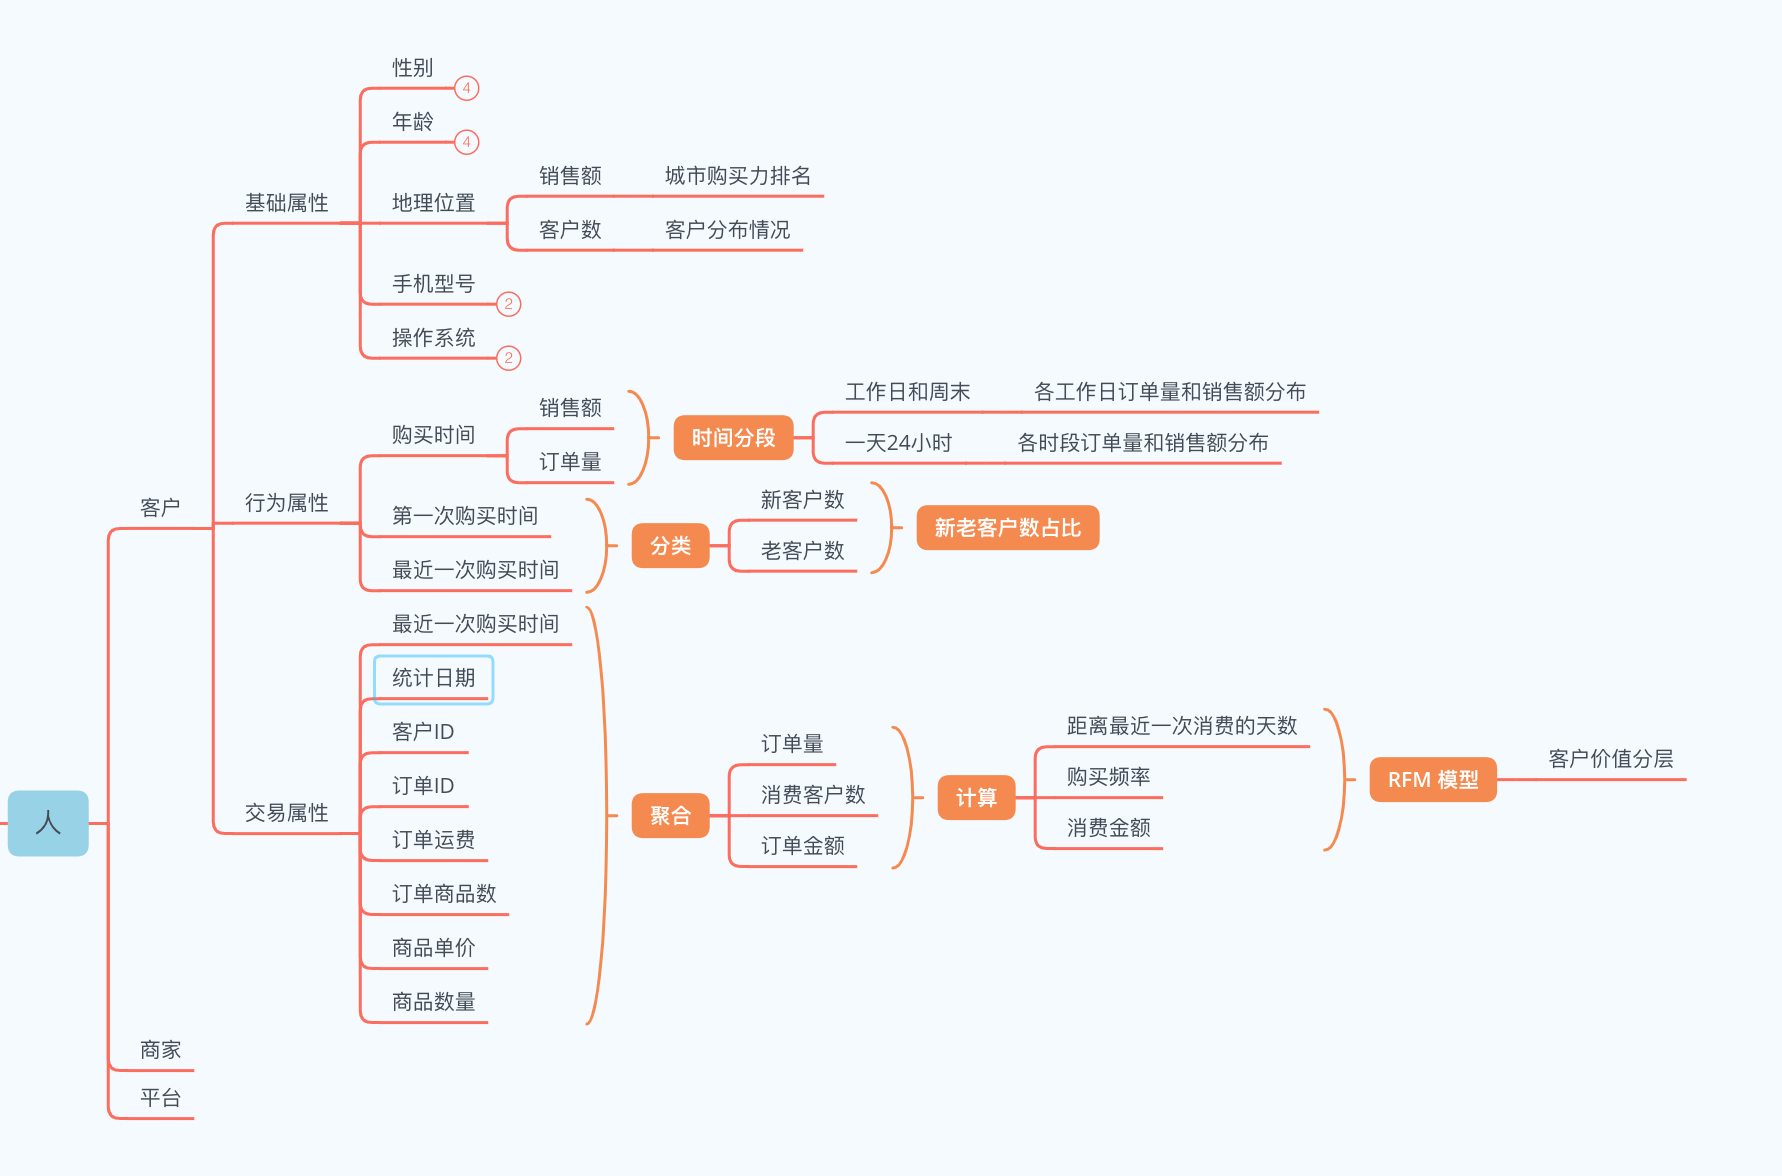

- 分析对象：客户
- 分析模块
    - 模块一：基础属性
        - 客户地理分布情况(全)
        - 城市购买力排名(全)
    - 模块二：行为偏好
        - 各时段订单量和销售额分布(全)
        - 各工作日订单量和销售额分布(全)
        - 客户付款方式偏好 (全)
        - 客户生命周期分析
        - 新老客户数占比(全)
    - 模块三：交易属性
        - 客户生命周期
        - 客户行为分层(活跃，回流，购买)
        - RFM 客户价值分层(全)

## 模块一：基础属性

### 客户地理位置分布情况  

![location_dashboard](location_dashboard.png)

#### 各州、城市客户分布

Olist 客户主要集中在7个州和9个城市，巴西圣保罗州(SP)、里约热内卢州(RJ)、米纳斯吉拉斯州(MG)这三个州的客户数处于前列。其中，巴西圣保罗州(SP)是客户数最多的州，占总客户数的 41.94%，而客户数分布最多的城市是巴西圣保罗州的 sao paulo(圣保罗) ，约占 15.56%

#### 城市购买力排名

购买力排名的前三强为 sao paulo(圣保罗)，rio de janeiro(里约热内卢)，belo horizonte(贝洛奥里藏特)

## 模块二：行为偏好

### 客户购物偏好

![客户购物偏好](客户购物偏好.png)

#### 客户付款方式偏好

115015个订单中，客户付款方式首选信用卡 credit_card 支付，占比高达73.81%，其次是通过线下付款的方式 boleto(巴西主流的线下支付工具)，占比19.43%,代金券 voucher 和借记卡 debit_card 分别占比5.32%和1.44%。

#### 客户购物时间偏好
- 客户下单时间主要集中在早上9:00到晚上22:00
- 工作日的订单量和销售金额表现优于周末

## 模块三：交易属性

- 新老客户占比
- 客户消费行为分析
- RFM 客户价值分层

### 新老客户占比

#### 新老客户数占比

In [168]:
# 新增字段：购买日期，购买年月

basic_data['order_date'] = basic_data['order_purchase_timestamp'].dt.date
basic_data['order_yearmonth'] = basic_data['order_purchase_timestamp'].dt.to_period('M')

In [176]:
# 客户首次购买时间和最近一次购买时间

user_life = basic_data.groupby('customer_unique_id',as_index=False).order_date.agg([min,max])
user_life.head()

,min,max
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-10
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-07
0000f46a3911fa3c0805444483337064,2017-03-10,2017-03-10
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2017-10-12
0004aac84e0df4da2b147fca70cf8255,2017-11-14,2017-11-14


Text(0, 0.5, '客户数')

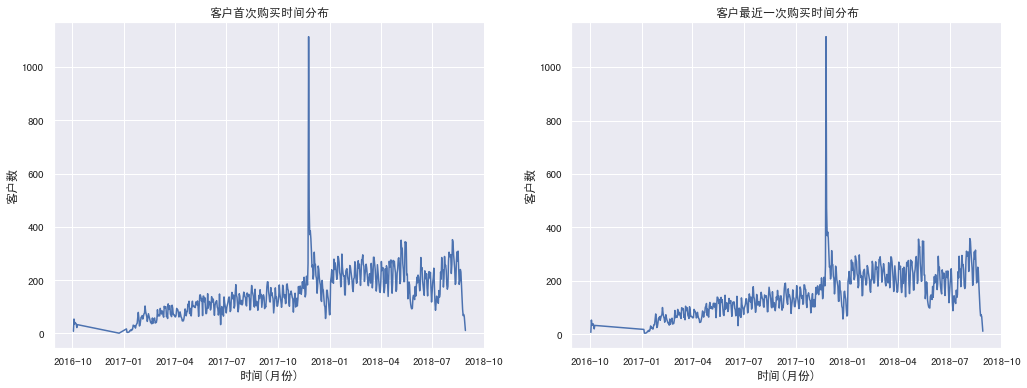

In [189]:
# 客户首次购买时间和最近一次购买时间分布

fig,axes=plt.subplots(1,2,figsize=(17,6)) #创建一个一行两列的画布

user_life['min'].value_counts().plot(ax=axes[0])
axes[0].set_title('客户首次购买时间分布')
axes[0].set_xlabel('时间(月份)')
axes[0].set_ylabel('客户数')

user_life['max'].value_counts().plot(ax=axes[1])
axes[1].set_title('客户最近一次购买时间分布')
axes[1].set_xlabel('时间(月份)')
axes[1].set_ylabel('客户数')

In [195]:
# 查询只进行过一次购买的客户数
new_old = (user_life['min'] == user_life['max']).value_counts(normalize=True)
new_old

True     0.978423
False    0.021577
dtype: float64

- 从分布可以看到，
    - 客户第一次购买的分布和最近一次购买的分布十分相识，说明大部分用户只购买了一次，就再也没有购买过了。
    - 在2017年11月，新用户数暴涨。
- 从客户数可以看出，新客户数占总客户数97.8%，老客户数占总客户数2.2%


#### 新老客户贡献占比

![新老客户仪表板](新老客户仪表板.png)


再结合新老客户贡献占比情况，可以得出，客户购买一次后，基本都流失完了，说明该电商平台在留存工作方面没有到位，亟需改善。

### 客户消费行为分析

按照客户的消费行为，对客户简单划分成几个层：新用户、活跃用户、不活跃用户、回流用户。

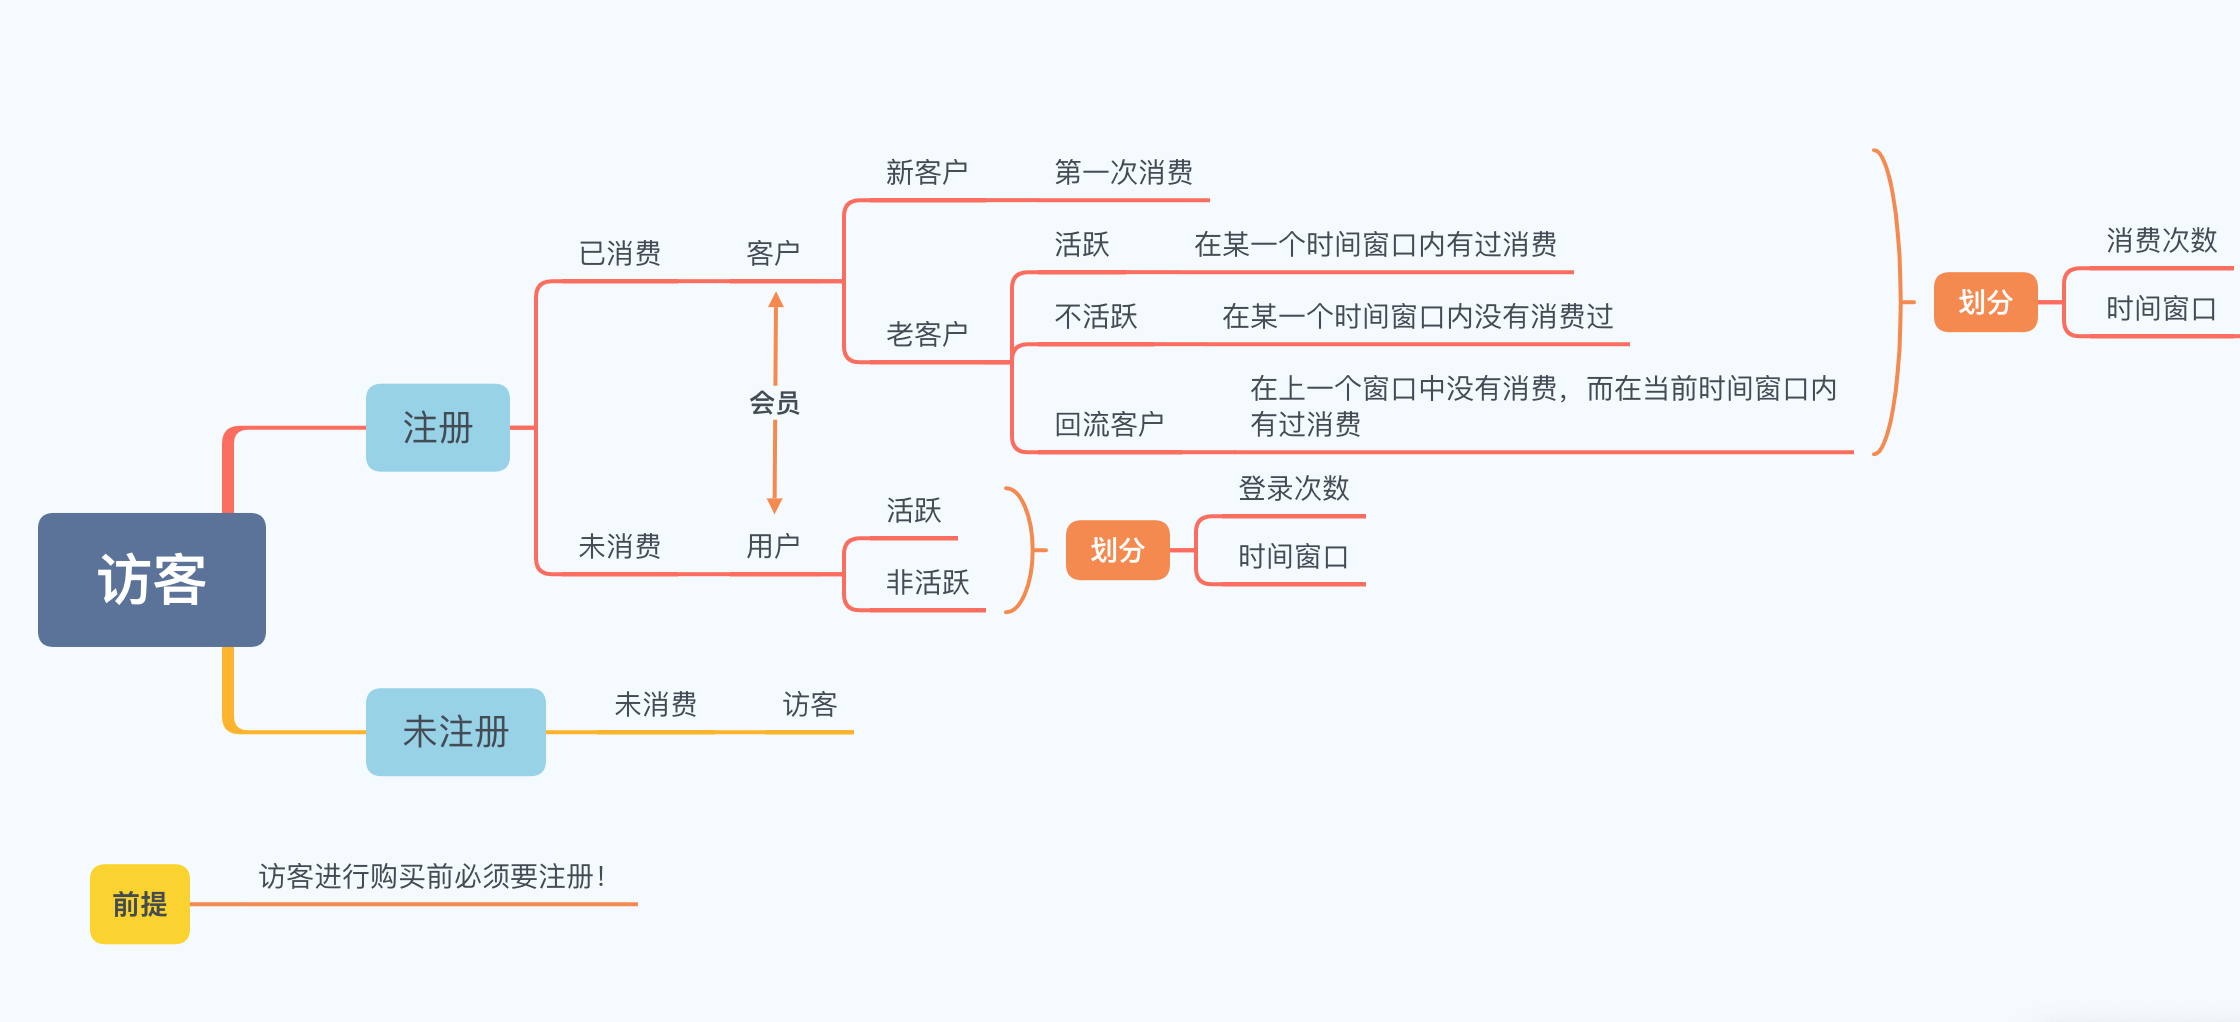

- 新客户：第一次消费的客户
- 活跃客户：连续两个时间窗口都消费过的客户
- 不活跃客户：时间窗口内没有消费过的活跃客户
- 回流客户：回流客户是在上一个窗口中没有消费，而在当前时间窗口内有过消费

**这里把时间窗口定为1个月**

In [48]:
# 求每月每位客户的消费次数，用户 id 为 index, 月为 column
# 次数为的地方是 NAN，把 NAN 填充为0

purchase_times = pd.pivot_table(basic_data,index=("customer_unique_id"),columns=("order_month"),values=("order_date"),aggfunc=("count")).fillna(0)
purchase_times.head()                         

order_month,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


每个用户每月消费次数有0次，1次，2次，n 次。这里把有消费次数的变为1，没有消费变为0

In [49]:
purchase_times = purchase_times.applymap(lambda x:1 if x>0 else 0)
purchase_times.head()

order_month,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


这里一共有22个月

对访客进行判断，判断逻辑如下图:

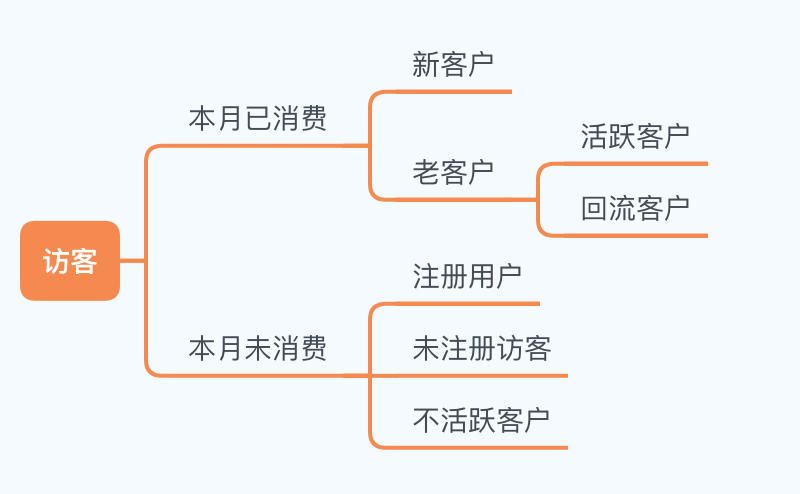

In [74]:
def active_status(data):
    status = []
    for i in range(22):   
        # 本月未消费
        if data[i] == 0:
            if len(status) > 0:
                if data[i-1] == '注册用户/未注册访客':
                    status.append('注册用户/未注册访客')
                else:
                    status.append('不活跃客户')
            else:
                status.append('注册用户/未注册访客')
                
        # 本月消费过
        else:
            if len(status) == 0:
                status.append('新客户')                                 
            else:
                if data[-1] == '不活跃客户':
                    status.append('回流客户')
                elif data[-1] == '注册用户/未注册访客':
                    status.append('新客户')
                else:
                    status.append('活跃客户')
#     # 将列表转化为 series 
#     return pd.Series(status)
    return status

purchase_status = purchase_times.apply(lambda x:active_status(x),axis=1)
purchase_status.head()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    [注册用户/未注册访客, 不活跃客户, 不活跃客户, 不活跃客户, 不活跃客户, 不活跃客户...
0000b849f77a49e4a4ce2b2a4ca5be3f    [注册用户/未注册访客, 不活跃客户, 不活跃客户, 不活跃客户, 不活跃客户, 不活跃客户...
0000f46a3911fa3c0805444483337064    [注册用户/未注册访客, 不活跃客户, 不活跃客户, 不活跃客户, 活跃客户, 不活跃客户,...
0000f6ccb0745a6a4b88665a16c9f078    [注册用户/未注册访客, 不活跃客户, 不活跃客户, 不活跃客户, 不活跃客户, 不活跃客户...
0004aac84e0df4da2b147fca70cf8255    [注册用户/未注册访客, 不活跃客户, 不活跃客户, 不活跃客户, 不活跃客户, 不活跃客户...
dtype: object

In [75]:
def active_status(data):
    status = []
    for i in range(22):   
        # 本月未消费
        if data[i] == 0:
            if len(status) > 0:
                if data[i-1] == '注册用户/未注册访客':
                    status.append('注册用户/未注册访客')
                else:
                    status.append('不活跃客户')
            else:
                status.append('注册用户/未注册访客')
                
        # 本月消费过
        else:
            if len(status) == 0:
                status.append('新客户')                                 
            else:
                if data[-1] == '不活跃客户':
                    status.append('回流客户')
                elif data[-1] == '注册用户/未注册访客':
                    status.append('新客户')
                else:
                    status.append('活跃客户')
    # 将列表转化为 series 
    return pd.Series(status)

purchase_status = purchase_times.apply(active_status,axis=1)
purchase_status.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户
0000b849f77a49e4a4ce2b2a4ca5be3f,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户
0000f46a3911fa3c0805444483337064,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户
0000f6ccb0745a6a4b88665a16c9f078,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户
0004aac84e0df4da2b147fca70cf8255,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户


In [76]:
def active_status(data):
    status = []
    for i in range(22):   
        # 本月未消费
        if data[i] == 0:
            if len(status) > 0:
                if data[i-1] == '注册用户/未注册访客':
                    status.append('注册用户/未注册访客')
                else:
                    status.append('不活跃客户')
            else:
                status.append('注册用户/未注册访客')
                
        # 本月消费过
        else:
            if len(status) == 0:
                status.append('新客户')                                 
            else:
                if data[-1] == '不活跃客户':
                    status.append('回流客户')
                elif data[-1] == '注册用户/未注册访客':
                    status.append('新客户')
                else:
                    status.append('活跃客户')
    return status

purchase_status = purchase_times.apply(lambda x:pd.Series(active_status(x)),axis=1)
purchase_status.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户
0000b849f77a49e4a4ce2b2a4ca5be3f,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户
0000f46a3911fa3c0805444483337064,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户
0000f6ccb0745a6a4b88665a16c9f078,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户
0004aac84e0df4da2b147fca70cf8255,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户


对比三种情况的输出

- `purchase_status = purchase_times.apply(lambda x:active_status(x),axis=1)`，其中函数返回 status 是 list
- `purchase_status = purchase_times.apply(active_status,axis=1)`，其中函数返回 status 是 pd.Series
- `purchase_status = purchase_times.apply(lambda x : pd.Series(active_status(x)),axis=1)`，其中函数返回 status 是 list

？问题 - 为什么apply后，数据的列名没了，变成了0，1，2

- 因为，当apply设置了axis=1对行进行操作时，**会默认将每一行数据以Series的形式（Series的索引为列名）传入指定函数**，返回相应的结果。
- 而传入函数后，返回结果为列表，列名自然没有了。

In [83]:
def active_status(data):
    status = []
    for i in range(22):   
        # 本月未消费
        if data[i] == 0:
            if len(status) > 0:
                if data[i-1] == '注册用户/未注册访客':
                    status.append('注册用户/未注册访客')
                else:
                    status.append('不活跃客户')
            else:
                status.append('注册用户/未注册访客')
                
        # 本月消费过
        else:
            if len(status) == 0:
                status.append('新客户')                                 
            else:
                if data[-1] == '不活跃客户':
                    status.append('回流客户')
                elif data[-1] == '注册用户/未注册访客':
                    status.append('新客户')
                else:
                    status.append('活跃客户')
    # 将列表转化为 series 
    return pd.Series(status)

purchase_status = purchase_times.apply(active_status,axis=1)
purchase_status.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户
0000b849f77a49e4a4ce2b2a4ca5be3f,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户
0000f46a3911fa3c0805444483337064,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户
0000f6ccb0745a6a4b88665a16c9f078,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户
0004aac84e0df4da2b147fca70cf8255,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户


In [87]:
# 由于返回的 dataframe 列名发生了改变，我们需要重新倒入列名。

purchase_columns = basic_data.order_month.sort_values().unique()
purchase_status.columns = purchase_columns
purchase_status.head()

,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户
0000b849f77a49e4a4ce2b2a4ca5be3f,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户
0000f46a3911fa3c0805444483337064,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户
0000f6ccb0745a6a4b88665a16c9f078,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户
0004aac84e0df4da2b147fca70cf8255,注册用户/未注册访客,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,...,活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户,不活跃客户


In [88]:
# 将注册用户/未注册访客替换为空值，这样 count 计算时不会计算到，并统计每月各状态客户数量。

purchase_status_count = purchase_status.replace('注册用户/未注册访客',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_count.head(5)

,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
不活跃客户,NaN,93338.0,92623.0,91721.0,90831.0,91065.0,89861.0,90263.0,89537.0,89225.0,...,86157.0,87889.0,86365.0,86938.0,86425.0,86596.0,86647.0,87281.0,87242.0,87029.0
新客户,267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
活跃客户,NaN,1.0,716.0,1618.0,2508.0,2274.0,3478.0,3076.0,3802.0,4114.0,...,7182.0,5450.0,6974.0,6401.0,6914.0,6743.0,6692.0,6058.0,6097.0,6310.0


Text(0.5, 1.0, '每月各类客户类型占比面积堆叠图')

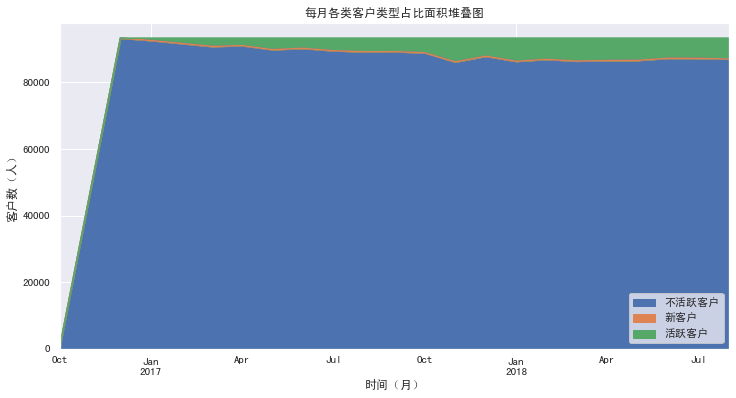

In [91]:
# 用0填充NaN
# 使用 .T 对 dataframe 数据进行转置，并可视化

ax = purchase_status_count.fillna(0).T.plot(kind="area",figsize = (12,6))
ax.set_xlabel('时间（月）') 
ax.set_ylabel('客户数（人）') 
ax.set_title('每月各类客户类型占比面积堆叠图')

由图可知，

- 蓝色的不活跃客户始终是占据大头的，这也跟我们之前的图表结果相符，大部分客户购买一次后基本都流失完了。
- 绿色的活跃客户相对稳定，是属于核心客户群。
- 橙色的新客户，相对稳定。
- 回流用户为零。

结合不活跃客户和回流用户，该电商平台客户流失十分严重。如果电商平台能在留存上取得突破，会给平台带来很大的增长空间。

### RFM 模型细分客户价值

- R（Recency）：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则表示客户交易发生的日期越近。
- F（Frequency）：客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
- M（Monetary）：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。

#### 获取 RFM 三个指标

In [233]:
# 获取指标
rfm_table=pd.pivot_table(basic_data,index=["customer_unique_id"],values=['order_purchase_timestamp',"order_id","payment_value"],aggfunc={"order_purchase_timestamp":"max","order_id":"count","payment_value":"sum"})
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93339 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  93339 non-null  int64         
 1   order_purchase_timestamp  93339 non-null  datetime64[ns]
 2   payment_value             93339 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.8+ MB


##### R值

R值最近一次消费时间表示用户最近一次消费距离统计时间，消费时间越近的客户价值越大。所以要将 order_purchase_timestamp 里面具体的日期变成R中的天数。

假设统计时间是数据中日期时间最大那天 

In [235]:
# 两个日期相减
rfm_table['R'] = (rfm_table['order_purchase_timestamp'].max() - rfm_table['order_purchase_timestamp'])
# 获取天数差
rfm_table['R'] = rfm_table['R'].map(lambda x:x.days) 
rfm_table['R'].head()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    111
0000b849f77a49e4a4ce2b2a4ca5be3f    114
0000f46a3911fa3c0805444483337064    536
0000f6ccb0745a6a4b88665a16c9f078    320
0004aac84e0df4da2b147fca70cf8255    287
Name: R, dtype: int64

##### F值、M值

再将 order_id 和 order_total 重命名为F、M

In [236]:
# 为了助于理解，对字段进行更名处理
rfm_table.rename(columns={"order_id":"F","payment_value":"M"},inplace=True)
rfm_table.head()

,F,order_purchase_timestamp,M,R
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,141.90,111
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,27.19,114
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,86.22,536
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,43.62,320
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,196.89,287


In [237]:
# 查看数据信息
rfm = rfm_table[["R","F","M"]]
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93339 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       93339 non-null  int64  
 1   F       93339 non-null  int64  
 2   M       93339 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.8+ MB


#### 确定分层基线

观察R、F、M的分布情况，找到合适的基线对R、F、M 进行分层

In [238]:
# 观察数据基本情况
rfm.describe()

,R,F,M
count,93339.000000,93339.000000,93339.000000
mean,236.925101,1.232229,211.841525
std,152.577685,0.819828,642.226549
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,63.750000
50%,218.000000,1.000000,112.950000
75%,345.000000,1.000000,201.740000
max,694.000000,75.000000,109312.640000


<Figure size 720x360 with 0 Axes>

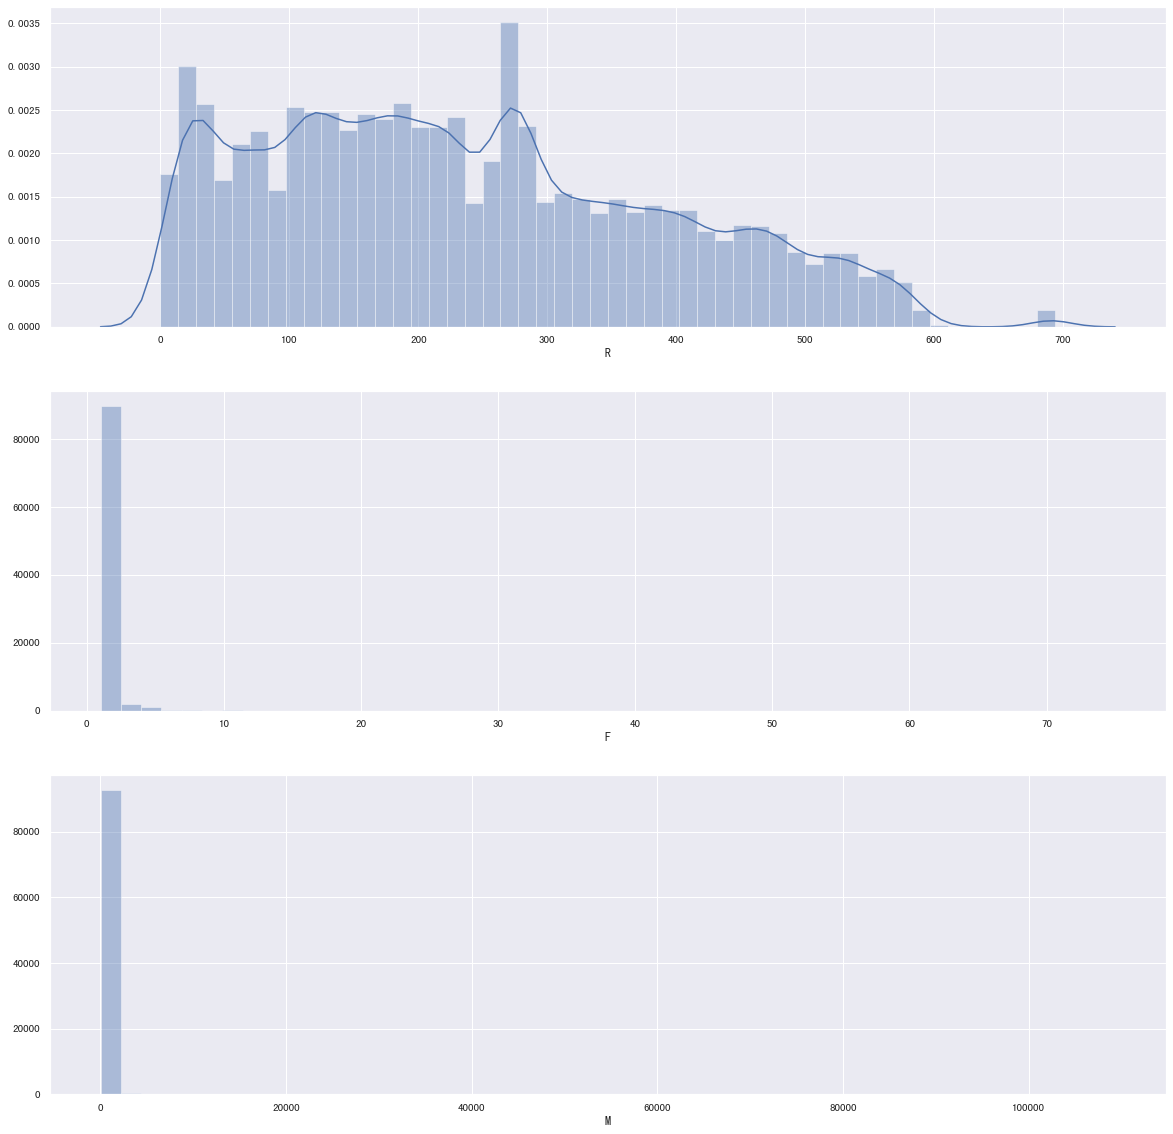

In [239]:
# 查看分布情况
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

fig,axes=plt.subplots(3,1,figsize=(20, 20)) #创建一个一行三列的画布
sns.distplot(rfm['R'],ax=axes[0]) #左图
sns.distplot(rfm['F'],kde=False,ax=axes[1]) #中图
sns.distplot(rfm['M'],kde=False,ax=axes[2]) #右图

从上可得

- R值采用中位数进行划分
- F值存在很严重的偏态分布，F的数值大多集中在1，即消费频次只有1次，至少占整体75%,最大值为75。无法使用分位数方法来均分出2个等级，为了体现出区分度，这里使用自定义区间 bins= [1,75] 进行划分。
- M值存在很严重的偏态分布，75%的M数值小于201.74，最大值为 109312.64，这里使用四分之三位数进行划分。

#### 构造 RFM 模型
(三个指标的权重一致)

一般而言，消费类的数据呈现长尾分布，都是长尾形态。80%甚至90%以上都集中在低频低额区间，少数的用户贡献了收入的大头，俗称二八法则。采用平均数无法很好的体现数组的特性，长尾用户很容易被平均。基线根据数据分布情况而定。

**注意：由于R值的大小和用户价值呈现反比，所以高于基线的时候算低纬度，低于基线时算高纬度。**

- R
    + 基线 
        - 中位数
    + 规则
        - 高于基线为0(低纬度)
        - 低于基线为1(高纬度)

- F
    + 基线
        - [1,75] 
    + 规则
        - 高于基线为1(高纬度)
        - 低于基线为0(低纬度)

- M
    + 基线
        - 四分位数
    + 规则
        - 高于基线为1(高纬度)
        - 低于基线为0(低纬度) 

In [252]:
# 对 R、F、M 划分

rfm['r_quartile'] = pd.qcut(rfm['R'], 2, labels=['1','0'])
rfm['f_quartile'] = pd.cut(rfm['F'], bins=[0,1,75], labels=['0','1'])
rfm['m_quartile'] = pd.qcut(rfm['M'], [0,0.75,1], labels=['0','1'])

rfm.head()

,R,F,M,r_quartile,f_quartile,m_quartile,RFM_Score,customer_class
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,0,0,100,一般发展客户
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,0,0,100,一般发展客户
0000f46a3911fa3c0805444483337064,536,1,86.22,0,0,0,000,一般挽留客户
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,0,0,000,一般挽留客户
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,0,0,000,一般挽留客户


In [253]:
# 计算出 RFM 的总分

rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,R,F,M,r_quartile,f_quartile,m_quartile,RFM_Score,customer_class
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,0,0,100,一般发展客户
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,0,0,100,一般发展客户
0000f46a3911fa3c0805444483337064,536,1,86.22,0,0,0,000,一般挽留客户
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,0,0,000,一般挽留客户
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,0,0,000,一般挽留客户


#### RFM 模型划分客户：

重要价值客户、重要保持客户、重要发展客户、重要挽留客户、一般价值客户、一般保持客户、一般发展客户、一般挽留客户（8层）

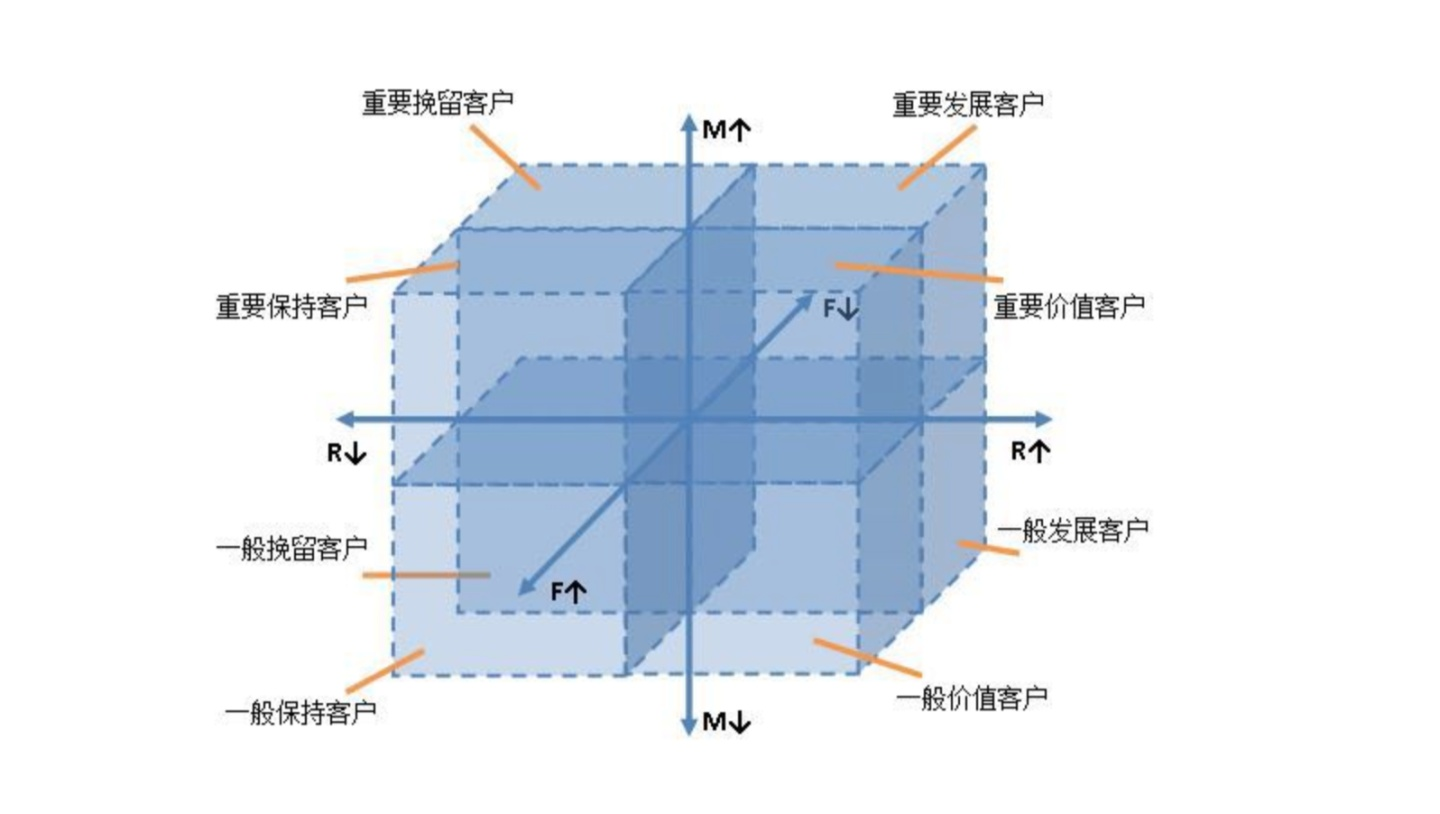

In [254]:
# 筛选出重要价值客户

rfm[rfm['RFM_Score']=='111'].sort_values('M', ascending=False).head()

,R,F,M,r_quartile,f_quartile,m_quartile,RFM_Score,customer_class
customer_unique_id,,,,,,,,
c402f431464c72e27330a67f7b94d4fb,187,20,44048.00,1,1,1,111,NaN
ef8d54b3797ea4db1d63f0ced6a906e9,132,10,30186.00,1,1,1,111,重要价值客户
763c8b1c9c68a0229c42c9fc6f662b93,45,4,29099.52,1,1,1,111,重要价值客户
c8460e4251689ba205045f3ea17884a1,21,24,27935.46,1,1,1,111,NaN
eae0a83d752b1dd32697e0e7b4221656,126,15,25051.89,1,1,1,111,重要价值客户


将 RFM 总分映射为客户八大类

RFM 总分 | 客户类别
-|-
111|重要价值客户
011|重要保持客户
101|重要发展客户
001|重要挽留客户
111|一般价值客户
011|一般保持客户
101|一般发展客户
001|一般挽留客户

In [255]:
# RFM 总分映射为八类客户
customer_classification = {
"111":"重要价值客户",
"011":"重要保持客户",
"101":"重要发展客户",
"001":"重要挽留客户",
"110":"一般价值客户",
"010":"一般保持客户",
"100":"一般发展客户",
"000":"一般挽留客户",
}

rfm['customer_class'] = rfm['RFM_Score'].map(customer_classification)
rfm.head()

,R,F,M,r_quartile,f_quartile,m_quartile,RFM_Score,customer_class
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,0,0,100,一般发展客户
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,0,0,100,一般发展客户
0000f46a3911fa3c0805444483337064,536,1,86.22,0,0,0,000,一般挽留客户
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,0,0,000,一般挽留客户
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,0,0,000,一般挽留客户


#### 导出到 mysql 数据库

In [257]:
# 导出数据库
data = rfm
table_name = 'RFM_data'
export_mysql(data,user,password,host_port,db,table_name)

将清洗后的数据导出到 mysql
成功导出


#### 客户价值细分
数据可视化

![RFM仪表板](RFM仪表板.png)

## 分析视角：人 - 平台

- 分析对象：电商平台
- 分析模块：满意度调查
    - 参与满意度调查的顾客数
    - 顾客满意度评分占比
    - 顾客满意度调查完成天数
    - 顾客满意度调查填写时间段
    
### 模块1：满意度调查

#### 处理数据

##### 合并相关数据集

根据需要分析的指标，选定对应表和数据集，并进行合并

数据集/表名|说明
-|-
basic_data|订单基本数据
olist_Order Reviews Dataset.csv|客户所做评论的数据

In [262]:
# 合并数据集
review_data = pd.merge(basic_data,reviews, on='order_id',how='left')
print('合并后数据集所有字段\n',review_data.columns.values)
print('==='*15)

# 选取子集
review_data = review_data[['order_id','customer_unique_id','order_purchase_timestamp','review_id','review_score','review_creation_date','review_answer_timestamp']]
review_data.info()

合并后数据集所有字段
 ['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date'
 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value' 'customer_unique_id' 'customer_zip_code_prefix'
 'customer_city' 'customer_state' 'order_item_id' 'product_id' 'seller_id'
 'shipping_limit_date' 'price' 'freight_value' 'review_id' 'review_score'
 'review_comment_title' 'review_comment_message' 'review_creation_date'
 'review_answer_timestamp']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115708 entries, 0 to 115707
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  115708 non-null  object        
 1   customer_unique_id        115708 non-null  object        
 2   order_purchase_timestamp  115708 non-null  datetime64[ns]
 3  

各个字段说明如下

字段 | 说明
-|-
order_id|订单ID
customer_unique_id|客户唯一标识符
order_purchase_timestamp|下单时间
review_id|满意度调查ID
review_score|评价得分，1到5分(假设5分最好)
review_creation_date|发出满意度调查日期
review_answer_timestamp|客户满意度回复日期

##### 清洗数据集

In [263]:
# 预览数据集
review_data.head()

,order_id,customer_unique_id,order_purchase_timestamp,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18 00:00:00,2018-08-22 19:07:58


In [264]:
# 统计缺失值数量和占比

missing_info(review_data,10)

                          total missing missing percentage
review_answer_timestamp               0              0.00%
review_creation_date                  0              0.00%
review_score                          0              0.00%
review_id                             0              0.00%
order_purchase_timestamp              0              0.00%
customer_unique_id                    0              0.00%
order_id                              0              0.00%


In [265]:
# 观察数据异常情况
review_data.describe()

,review_score
count,115708.000000
mean,4.065086
std,1.359622
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [267]:
# 查看数据信息
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115708 entries, 0 to 115707
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  115708 non-null  object        
 1   customer_unique_id        115708 non-null  object        
 2   order_purchase_timestamp  115708 non-null  datetime64[ns]
 3   review_id                 115708 non-null  object        
 4   review_score              115708 non-null  int64         
 5   review_creation_date      115708 non-null  object        
 6   review_answer_timestamp   115708 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 7.1+ MB


In [270]:
# 查看每一行数据是否存在重复值

review_data.duplicated().sum()

18713

In [272]:
# 查看重复数据

review_data[review_data.duplicated() == True]

,order_id,customer_unique_id,order_purchase_timestamp,review_id,review_score,review_creation_date,review_answer_timestamp
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
11,e69bfb5eb88e0ed6a785585b27e16dbf,299905e3934e9e181bfb2e164dd4b4f8,2017-07-29 11:55:02,abc5655186d40772bd6e410420e6a3ed,5,2017-08-17 00:00:00,2017-08-18 01:47:32
13,e6ce16cb79ec1d90b1da9085a6118aeb,f2a85dec752b8517b5e58a06ff3cd937,2017-05-16 19:41:10,15898b543726a832d4137fbef5d1d00e,1,2017-05-30 00:00:00,2017-05-30 23:13:47
23,83018ec114eee8641c97e08f7b4e926f,634f09f6075fe9032e6c19609ffe995a,2017-10-26 15:54:26,219cf59cf889bc85babbd1cd1fe30f2d,4,2017-11-09 00:00:00,2017-11-10 01:06:29
...,...,...,...,...,...,...,...
115696,9115830be804184b91f5c00f6f49f92d,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,ebd75732b5804e934123d11ec1f11db0,5,2017-10-21 00:00:00,2017-10-23 14:48:40
115697,9115830be804184b91f5c00f6f49f92d,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,ebd75732b5804e934123d11ec1f11db0,5,2017-10-21 00:00:00,2017-10-23 14:48:40
115698,9115830be804184b91f5c00f6f49f92d,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,ebd75732b5804e934123d11ec1f11db0,5,2017-10-21 00:00:00,2017-10-23 14:48:40
115700,aa04ef5214580b06b10e2a378300db44,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 00:30:03,e8995c053d3db2d9c07407efe7de52dd,5,2017-02-08 00:00:00,2017-02-11 12:37:36


In [273]:
# 处理重复数据

review_data = review_data.drop_duplicates()
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96995 entries, 0 to 115707
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96995 non-null  object        
 1   customer_unique_id        96995 non-null  object        
 2   order_purchase_timestamp  96995 non-null  datetime64[ns]
 3   review_id                 96995 non-null  object        
 4   review_score              96995 non-null  int64         
 5   review_creation_date      96995 non-null  object        
 6   review_answer_timestamp   96995 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.9+ MB


In [274]:
# 转化格式

data = review_data
column_list =['order_purchase_timestamp','review_creation_date','review_answer_timestamp'] 
transform_datetime(data,column_list)

日期时间数据类型转化完成


数据清洗后
- 样本大小：96995 条数据
- 字段：7个
- 无异常值,无缺失值
- 有少量重复值，已删除

##### 导出到 mysql 数据库

In [275]:
# 导出数据库
data = review_data
table_name = 'review_data'
export_mysql(data,user,password,host_port,db,table_name)

将清洗后的数据导出到 mysql
成功导出


#### 客户满意度调查情况

![调查仪表板](调查仪表板.png)

##### 客户满意度评分占比
- 客户对该电商平台满意度较高，好评率高达80%。
    + 以（1-2分：差评，3分：中评，4-5分：好评）为评价标准。参与满意度调查的客户数一共有4,213名，其中评价5分占比最高，为58.78%，4分占比20.15%，好评率近80%，用户满意度较高；但1分和2分合计占比12.4%左右，平台还有一定的提高空间。

##### 客户满意度调查填写时间段
- 上午10时至下午14时、晚上21时至第二天凌晨1点这两个时间段是客户完成调查的高峰期

##### 客户满意度调查完成天数
- 满意度调查发布3天内，回收率达 85.8%
    + 大部分客户会在调查发布当天或者隔1-3天填写并提交
    + 1-3天内未填写的客户，大概率会遗忘，调查回收最长可达 518 天

建议
- 为了，提高调查回收率，建议调查发布1周后，提醒未填写的用户
- 可选择在上午10时至下午14时、晚上21时至第二天凌晨1点这两个时间段发布满意度调查或者提醒尚未填写的客户

## 分析视角：货

- 分析对象：商品
    - 商品、品类销售情况
    - 各品类贡献的销售额分布
    - 根据二八原理划分商品品类
    
### 模块1：商品交易

#### 处理数据

##### 合并相关数据集

根据需要分析的指标，选定对应表和数据集，并进行合并

数据集/表名|说明
-|-
basic_data|订单基本数据
list_Products Dataset.csv| 商品数据
product_category_name_english|产品品类名称（英语）

In [295]:
# 合并数据集
res = pd.merge(basic_data,products, on='product_id',how='left')
pro_data = pd.merge(res,pro_trans, on='product_category_name',how='left')
print('合并后数据集所有字段\n',pro_data.columns.values)
print('==='*15)

# 选取子集
product_data = pro_data[['order_id','order_item_id','customer_unique_id','product_id','product_category_name_english','price','freight_value','payment_value','order_status','order_purchase_timestamp']]
product_data.info()

合并后数据集所有字段
 ['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date'
 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value' 'customer_unique_id' 'customer_zip_code_prefix'
 'customer_city' 'customer_state' 'order_item_id' 'product_id' 'seller_id'
 'shipping_limit_date' 'price' 'freight_value' 'product_category_name'
 'product_name_lenght' 'product_description_lenght' 'product_photos_qty'
 'product_weight_g' 'product_length_cm' 'product_height_cm'
 'product_width_cm' 'product_category_name_english']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115015 entries, 0 to 115014
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115015 non-null  object        
 1   order_item_id             

In [296]:
# 预览数据集
product_data.head()

,order_id,order_item_id,customer_unique_id,product_id,product_category_name_english,price,freight_value,payment_value,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,housewares,29.99,8.72,18.12,delivered,2017-10-02 10:56:33
1,e481f51cbdc54678b7cc49136f2d6af7,1.0,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,housewares,29.99,8.72,2.00,delivered,2017-10-02 10:56:33
2,e481f51cbdc54678b7cc49136f2d6af7,1.0,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,housewares,29.99,8.72,18.59,delivered,2017-10-02 10:56:33
3,53cdb2fc8bc7dce0b6741e2150273451,1.0,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,perfumery,118.70,22.76,141.46,delivered,2018-07-24 20:41:37
4,47770eb9100c2d0c44946d9cf07ec65d,1.0,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,auto,159.90,19.22,179.12,delivered,2018-08-08 08:38:49


In [297]:
# 统计缺失值数量和占比

missing_info(product_data,10)

                               total missing missing percentage
product_category_name_english           1650              1.43%
order_purchase_timestamp                   0              0.00%
order_status                               0              0.00%
payment_value                              0              0.00%
freight_value                              0              0.00%
price                                      0              0.00%
product_id                                 0              0.00%
customer_unique_id                         0              0.00%
order_item_id                              0              0.00%
order_id                                   0              0.00%


缺失值处理：

- product_category_name_english 字段缺失值数量为1650，相对其他缺失数据较多，但是与整体数据相比较少,只占 1.43%，可删除缺失值。

In [298]:
# 删除缺失值
product_data = product_data.dropna()
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113365 entries, 0 to 115014
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113365 non-null  object        
 1   order_item_id                  113365 non-null  float64       
 2   customer_unique_id             113365 non-null  object        
 3   product_id                     113365 non-null  object        
 4   product_category_name_english  113365 non-null  object        
 5   price                          113365 non-null  float64       
 6   freight_value                  113365 non-null  float64       
 7   payment_value                  113365 non-null  float64       
 8   order_status                   113365 non-null  object        
 9   order_purchase_timestamp       113365 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 9.5+ MB


In [299]:
# 观察数据异常情况
product_data.describe()

,order_item_id,price,freight_value,payment_value
count,113365.000000,113365.000000,113365.000000,113365.000000
mean,1.196851,120.179106,20.024299,172.239539
std,0.701326,182.795481,15.753455,266.631134
min,1.000000,0.850000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,61.000000
50%,1.000000,74.900000,16.320000,108.140000
75%,1.000000,133.740000,21.200000,189.370000
max,21.000000,6735.000000,409.680000,13664.080000


In [300]:
# 查看每一行数据是否存在重复值

product_data.duplicated().sum()

643

In [301]:
# 查看重复数据

product_data[product_data.duplicated() == True]

,order_id,order_item_id,customer_unique_id,product_id,product_category_name_english,price,freight_value,payment_value,order_status,order_purchase_timestamp
387,d7f4e2f755cf2f40aa7c39804cfe01c4,1.0,37d2d1ac62901f9a36cff32ca86c9337,cec09725da5ed01471d9a505e7389d37,sports_leisure,69.90,20.98,30.22,delivered,2017-11-26 12:50:56
1112,92a9ef7f0a0d392c9ad0d5f44e86b4ba,1.0,c375736396906dff8414217e02c45661,9f1c3e71d56894398a42b050b07f1baa,cool_stuff,11.87,7.39,25.00,delivered,2018-03-25 16:43:56
1113,92a9ef7f0a0d392c9ad0d5f44e86b4ba,2.0,c375736396906dff8414217e02c45661,9f1c3e71d56894398a42b050b07f1baa,cool_stuff,11.87,7.39,25.00,delivered,2018-03-25 16:43:56
1114,92a9ef7f0a0d392c9ad0d5f44e86b4ba,3.0,c375736396906dff8414217e02c45661,9f1c3e71d56894398a42b050b07f1baa,cool_stuff,11.87,7.39,25.00,delivered,2018-03-25 16:43:56
1138,06875ab72c5b9bb2eb303a70031bfeb0,1.0,b14edf7220c5c77f27f11567178c24fb,f4c9a2926d5a2fe099ebbe7d0967bd37,fashion_bags_accessories,39.90,7.78,22.68,delivered,2018-01-11 20:04:57
...,...,...,...,...,...,...,...,...,...,...
113816,de06e436fbb3dd6e10bafb5f24ed5530,1.0,a3631b903f909b6749a452358116cf86,418d8bb517562fb8e8a2f1c5de0afa70,computers_accessories,19.90,16.11,9.17,delivered,2017-09-07 01:15:30
113991,5b03dc75d71e4a3940c88c4c9cdf6c2c,1.0,caa8b91f5582eca3d032203ad5a11c32,9af7b4a3262141c12ba9bd489a8573c7,market_place,47.90,18.28,20.00,delivered,2018-04-25 10:40:29
114311,aa61ca4def1d3385bafe461f6ef46faa,1.0,6b46cfed037b73c631cf418c96169857,c708ba7c6269161f89ce0683cdd7c432,watches_gifts,49.00,10.96,53.96,delivered,2017-02-24 20:28:53
114312,aa61ca4def1d3385bafe461f6ef46faa,2.0,6b46cfed037b73c631cf418c96169857,380b4664ba5bb18cc9db78ee6bac3558,watches_gifts,37.00,10.96,53.96,delivered,2017-02-24 20:28:53


In [302]:
# 去重处理

product_data = product_data.drop_duplicates()
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112722 entries, 0 to 115014
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112722 non-null  object        
 1   order_item_id                  112722 non-null  float64       
 2   customer_unique_id             112722 non-null  object        
 3   product_id                     112722 non-null  object        
 4   product_category_name_english  112722 non-null  object        
 5   price                          112722 non-null  float64       
 6   freight_value                  112722 non-null  float64       
 7   payment_value                  112722 non-null  float64       
 8   order_status                   112722 non-null  object        
 9   order_purchase_timestamp       112722 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 9.5+ MB


In [303]:
# 转化格式

data = product_data
column_list =['order_purchase_timestamp'] 
transform_datetime(data,column_list)

日期时间数据类型转化完成


数据清洗后
- 样本大小：112722 条数据
- 字段：10个
- 无异常值,无缺失值
- 有少量重复值，已删除

##### 导出到 mysql 数据库

In [304]:
# 导出数据库
data = product_data
table_name = 'pro_data'
export_mysql(data,user,password,host_port,db,table_name)

将清洗后的数据导出到 mysql
成功导出


#### 商品和品类销售情况

![品类和商品销售情况](品类和商品销售情况.png)

- 销量和销售额最高的是床上用品、洗漱用品、桌子类的商品。


![二八原理](二八原理.png)

#### 各品类贡献的销售额分布
- 不同品类的销售额贡献对比，23%的商品品类贡献了80%销售额，符合二八原理；

#### 根据二八原理划分商品品类
- 同时按照70%，20%，10%的销售额比重把产品分为一、二、三等级，便于优化产品结构和资源分配。

## 分析视角：场

- 分析对象：订单
    - 销售额
    - 订单量
    - 客单价
    
### 模块1：交易订单


#### 处理数据
使用 basic_data 构造整体销售情况子数据集 sales_data。

In [37]:
# 预览数据集 basic_data
basic_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_date,order_year,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,...,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,...,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,...,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,...,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-24,2018,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,...,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08,2018,8


In [125]:
# 新增日期字段、年份、月份字段
basic_data['order_date'] = basic_data['order_purchase_timestamp'].dt.date
basic_data['order_year'] = basic_data['order_purchase_timestamp'].dt.year
basic_data['order_month'] = basic_data['order_purchase_timestamp'].dt.month

sale_data = basic_data[['order_date','customer_unique_id','payment_value','order_year','order_month']]
sale_data.head()

,order_date,customer_unique_id,payment_value,order_year,order_month
0,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,18.12,2017,10
1,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,2.00,2017,10
2,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,18.59,2017,10
3,2018-07-24,af07308b275d755c9edb36a90c618231,141.46,2018,7
4,2018-08-08,3a653a41f6f9fc3d2a113cf8398680e8,179.12,2018,8


In [129]:
# 按照年份、月份对销售子数据集进行分组求和、计数，得到订单日期、销售额、客户数、订单量、年份、月份信息

sales_year = sale_data.groupby(['order_year','order_month']).agg({"order_date":"count","payment_value":"sum","customer_unique_id":"nunique"})

sales_year.rename(columns={"order_date":"order_number","payment_value":"total_pay","customer_unique_id":"customer_number"},inplace=True)
sales_year.head()

order_number  total_pay  customer_number
order_year order_month                                          
2016       10                    336   62591.65              267
           12                      1      19.62                1
2017       1                     961  176376.56              716
           2                    1949  323815.95             1618
           3                    3078  505735.83             2508

In [130]:
# 对以上数据进行拆分，每年为一个表。
year_2016 = sales_year.loc[2016,:].copy()
year_2017 = sales_year.loc[2017,:].copy()
year_2018 = sales_year.loc[2018,:].copy()
year_2016    # 看一下2016年的数据

,order_number,total_pay,customer_number
order_month,,,
10,336,62591.65,267
12,1,19.62,1


#### 销售额分析

构建销售表

In [131]:
# 构建销量表
sales=pd.concat([year_2016['total_pay'],year_2017['total_pay'],
                 year_2018['total_pay']],axis=1)
# 填充 NAN 值为0
sales =sales.fillna(0)

# 对行名和列名进行重命名
sales.columns=['Sales-2016','Sales-2017','Sales-2018']
sales.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
 
# 颜色越深，销售额越高
sales.style.background_gradient()

,Sales-2016,Sales-2017,Sales-2018
Jau,0.000000,176376.560000,1374064.020000
Feb,0.000000,323815.950000,1280014.540000
Mar,0.000000,505735.830000,1435458.330000
Apr,0.000000,456108.320000,1466548.460000
May,0.000000,701119.600000,1480407.710000
Jun,0.000000,585400.980000,1285396.780000
Jul,0.000000,716069.980000,1306707.420000
Aug,0.000000,842689.940000,1211240.090000
Sep,0.000000,996085.610000,0.000000
Oct,62591.650000,998609.620000,0.000000


结合上图可以看出，只有2017年的数据是整年的，2016和2018都或多或少不完整，不具备横向分析，所以这里只分析2017年的数据。

##### 2017年整体销售额表现

    - 2017年销售额整体呈上升趋势，在11月销售金额达到顶峰，且远高于其他月份，1月销售金额最低，3,5月达到了阶段性的小高峰；

    - 总的来说，后半年的表现远好于前半年，而且随着月份的增大，销售额也有明显的增加。

肉眼可见的是每月的销售额逐步增长，来实际计算一下具体的增长率。

In [132]:
# 计算环比

for i in range(1,len(year_2017)+1):
    if i == 1:
        year_2017.loc[i,'month_on_month'] = 0
    else:
        year_2017.loc[i,'month_on_month'] = (year_2017.loc[i,'total_pay'] - year_2017.loc[i-1,'total_pay'])/year_2017.loc[i-1,'total_pay']                                                                                                                                       

year_2017[["total_pay","month_on_month"]].style.background_gradient()

,total_pay,month_on_month
order_month,,
1,176376.560000,0.000000
2,323815.950000,0.835935
3,505735.830000,0.561800
4,456108.320000,-0.098129
5,701119.600000,0.537178
6,585400.980000,-0.165048
7,716069.980000,0.223213
8,842689.940000,0.176826
9,996085.610000,0.182031


##### 2017年每月销售额增长率表现

从上面可以看出，2、3、5、11月增速较快，其他月份表现平平。

#### 订单量分析
构建订单量表

In [146]:
# 构建订单数量信息表
orders=pd.concat([year_2016['order_number'],year_2017['order_number'],
                 year_2018['order_number']],axis=1)
# 填充 NAN 值为0
orders =orders.fillna(0)

# 对行名和列名进行重命名
orders.columns=['Orders-2016','Orders-2017','Orders-2018']
orders.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
 
# 颜色越深，订单量越高
orders.style.background_gradient()

,Orders-2016,Orders-2017,Orders-2018
Jau,0.000000,961,8364.000000
Feb,0.000000,1949,7766.000000
Mar,0.000000,3078,8337.000000
Apr,0.000000,2707,8111.000000
May,0.000000,4260,8102.000000
Jun,0.000000,3687,7318.000000
Jul,0.000000,4726,7196.000000
Aug,0.000000,5053,7354.000000
Sep,0.000000,5002,0.000000
Oct,336.000000,5455,0.000000


##### 2017年整体订单量表现

从上面可以看出，2017年订单量变化趋势与销售额是一样的，下半年整体高于上半年。

In [134]:
# 计算环比

for i in range(1,len(year_2017)+1):
    if i == 1:
        year_2017.loc[i,'month_on_month'] = 0
    else:
        year_2017.loc[i,'month_on_month'] = (year_2017.loc[i,'order_number'] - year_2017.loc[i-1,'order_number'])/year_2017.loc[i-1,'order_number']                                                                                                                                       

year_2017[["order_number","month_on_month"]].style.background_gradient()

,order_number,month_on_month
order_month,,
1,961,0.000000
2,1949,1.028096
3,3078,0.579271
4,2707,-0.120533
5,4260,0.573698
6,3687,-0.134507
7,4726,0.281801
8,5053,0.069192
9,5002,-0.010093


##### 2017年每月订单量增长率表现

从上面可以看出，2017年订单量增长率变化与销售额增长率是一样的，2、3、5、11月增速较快，其他月份表现平平。。

#### 客单价分析

客单价 = 消费总额/消费客户数 

构造客单价表

In [138]:
# 2016-2018年客单价

aovs=pd.concat([year_2016['total_pay'],year_2016['customer_number'],year_2017['total_pay'],year_2017['customer_number'],
                 year_2018['total_pay'],year_2018['customer_number']],axis=1)
# 对行名和列名进行重命名
aovs.columns=['Sales-2016','customers-2016','Sales-2017','customers-2017','Sales-2018','customers-2018']
aovs.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# 填充 NAN 值为0
aovs =aovs.fillna(0)

# 颜色越深，销售额越高
aovs.style.background_gradient()

,Sales-2016,customers-2016,Sales-2017,customers-2017,Sales-2018,customers-2018
Jau,0.000000,0.000000,176376.560000,716,1374064.020000,6974.000000
Feb,0.000000,0.000000,323815.950000,1618,1280014.540000,6401.000000
Mar,0.000000,0.000000,505735.830000,2508,1435458.330000,6914.000000
Apr,0.000000,0.000000,456108.320000,2274,1466548.460000,6743.000000
May,0.000000,0.000000,701119.600000,3478,1480407.710000,6692.000000
Jun,0.000000,0.000000,585400.980000,3076,1285396.780000,6058.000000
Jul,0.000000,0.000000,716069.980000,3802,1306707.420000,6097.000000
Aug,0.000000,0.000000,842689.940000,4114,1211240.090000,6310.000000
Sep,0.000000,0.000000,996085.610000,4082,0.000000,0.000000
Oct,62591.650000,267.000000,998609.620000,4417,0.000000,0.000000


In [144]:
# 2017年客单价
aovs_info=pd.concat([year_2016['total_pay']/year_2016['customer_number'],year_2017['total_pay']/year_2017['customer_number'],year_2018['total_pay']/year_2018['customer_number']],axis=1)

# 对行名和列名进行重命名
aovs_info.columns=['AOV-2016','AOV-2017','AOV-2018']
aovs_info.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# 填充 NAN 值为0
aovs_info =aovs_info.fillna(0)

# 颜色越深，销售额越高
aovs_info.style.background_gradient()

,AOV-2016,AOV-2017,AOV-2018
Jau,0.000000,246.335978,197.026673
Feb,0.000000,200.133467,199.971026
Mar,0.000000,201.649055,207.616189
Apr,0.000000,200.575339,217.491986
May,0.000000,201.587004,221.220519
Jun,0.000000,190.312412,212.181707
Jul,0.000000,188.340342,214.319734
Aug,0.000000,204.834696,191.955640
Sep,0.000000,244.019013,0.000000
Oct,234.425655,226.083228,0.000000


##### 2017年每月客单价趋势

结合上面两图，可知

- 每月的消费人数呈不断上升趋势，但是客单价总体浮动范围不是很大，稳定在200左右。